## Comparing Environmental Data for Sightings of Species

Goal: given a particular species and enviornmental data metric, will return the range of values of that metric when the species is present versus not.

Four functions:

<b>EnvironmentalMetricPresent(polygon, taxa, metric)</b> - returns data frame of taxa lat/lons within location and each sighting's environmental metric value
    
<b>EnvironmentalMetricRange(environmentalmetricdf, metric)</b> - returns range of metric values for taxa of interest within polygon

<b>GraphEnvironmentalMetric(environmentalmetricdf, taxa, metric)</b> - returns histogram of metric values for taxa of interest within polygon

<b>MapEnvironmentalMetric(environmentalmetricdf, taxa, metric)</b> - returns map of taxa sightings with colored metric values of interest


User will supply: Polygon, Taxa, Enviornmental Metric

In [1]:
##install packages and environments needed
installed <- rownames(installed.packages())
if ( !("robis" %in% installed) ){
   if ( !("remotes" %in% installed) )install.packages("remotes")
   remotes::install_github("iobis/robis")
}

library(robis)
library(RColorBrewer)
library(tidyverse)
library("rnaturalearth")
library("rnaturalearthdata")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### EnvironmentalMetricPresent: 
Returns dataframe with the value of that enviornmental metric for each sighting within polygon of interest

In [10]:
#input: polygon, taxa, metric
#return: dataframe with the metric value, lat, and long of each sighting within polygon

##Note: cannot take in chla data right now

EnvironmentalMetricPresent <- function(polygon, taxa, metric) {
    
    #obtain occurrences of taxa of interest within the polygon of interest
    taxaPresence <- occurrence(geometry = polygon, taxa)
    
    #create dataframe of the environmental data as well as the lat/lon of the sighting
    environmentalMetricDF <- data.frame(EnvironmentalData = taxaPresence[metric], 
                                   longitude = taxaPresence$decimalLongitude, 
                                   latitude = taxaPresence$decimalLatitude, 
                                   date = taxaPresence$eventDate)
    
    return(environmentalMetricDF)
}

In [11]:
##TEST OUT THE FUNCTION, using polygon shape from OBIS tutorial
polygontest = "POLYGON ((-70.2 43.5, -69.8 43.5, -69.8 43.9, -70.2 43.9, -70.2 43.5)) "
taxatest = "Chordata"
metrictest = "sst"

testDFresult <- EnvironmentalMetricPresent(polygontest, taxatest, metrictest)
head(testDFresult)
dim(testDFresult)
names(testDFresult)

Retrieved 3738 records of approximately 3738 (100%)


,sst,longitude,latitude,date
,<dbl>,<dbl>,<dbl>,<fct>
1,10.22,-69.95114,43.80256,1986-06-15
2,10.46,-70.03533,43.52917,1999-11-07T04:01:00Z
3,10.30,-69.87500,43.59860,2000-11-07T12:00:00Z
4,10.26,-69.87610,43.74680,2009-05-12T12:00:00Z
5,10.30,-69.83880,43.59270,2009-05-11T12:00:00Z
6,10.27,-69.97456,43.72517,1993-08-13


[1] 3738    4

[1] "sst"       "longitude" "latitude"  "date"

### EnvironmentalMetricRange

Given the resulting dataframe from the EnvironmentalMetricPresent function, return the range of values for that metric

In [4]:
#input: environmental metric dataframe and metric of interest
#output: returns range

EnvironmentalMetricRange <- function(inputdataframe, metric) {
 
    rangeValue <- range(inputdataframe[metric])
    return(rangeValue)
    }
    

In [5]:
##TEST OUT THE FUNCTION, using testdataframe from previous function

testRANGEresult <- EnvironmentalMetricRange(testDFresult, metrictest)

testRANGEresult

[1] 10.07 10.50

### GraphEnvironmentalMetric

Given the EnvironmentalMetric dataframe, plot the metric values on a histogram for all taxa sightings

In [12]:
#input: environmental dataframe, taxa, and metric of interest
#output: histogram of metric values

GraphEnvironmentalMetric <- function(inputDF, taxa, metric) {    
    
    
EnvironmentalHistogram <- 
    ggplot(inputDF, aes_string(x = metric)) +
    geom_bar(stat = "count") +
    theme_bw() +
    labs(title = paste("Environmental Metric", metric, "for Taxa", taxa)) +
    theme(plot.title = element_text(hjust = 0.5))
    
   return(EnvironmentalHistogram)

}

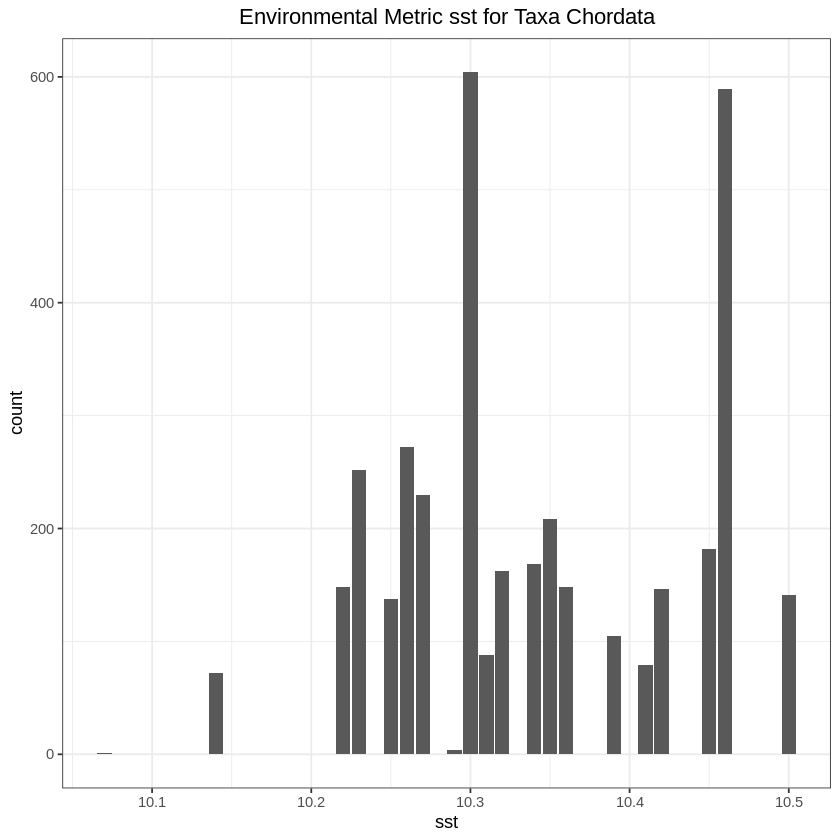

In [13]:
##Test out the function GraphEnvironmentalMetric
testHISTOGRAMresult <- GraphEnvironmentalMetric(testDFresult, taxatest, metrictest)

testHISTOGRAMresult

### MapEnvironmentalMetric

Take in dataframe and map species with their environmental metric by color

In [8]:
#input: environmental dataframe, taxa, and metric of interest
#output: map of location and metric values

MapEnvironmentalMetric <- function(inputdataframe, taxa, metric) {

minLon <- round(min(inputdataframe$longitude), 3) 
minLat <- round(min(inputdataframe$latitude), 3) 
maxLon <- round(max(inputdataframe$longitude), 3) 
maxLat <- round(max(inputdataframe$latitude), 3) 
    
world <- ne_countries(scale = "medium", returnclass = "sf")

MetricMap <- 
    ggplot(data=world)+
    geom_sf() +
    geom_point(data = inputdataframe, aes_string(x = "longitude", y = "latitude", color = metric)) +
    coord_sf(xlim = c(minLon, maxLon), ylim = c(minLat, maxLat), expand = TRUE) +
    labs(title = paste("Environmental Metric", metric, "for Taxa", taxa)) +
    theme(plot.title = element_text(hjust = 0.5))
    
    return(MetricMap)
}

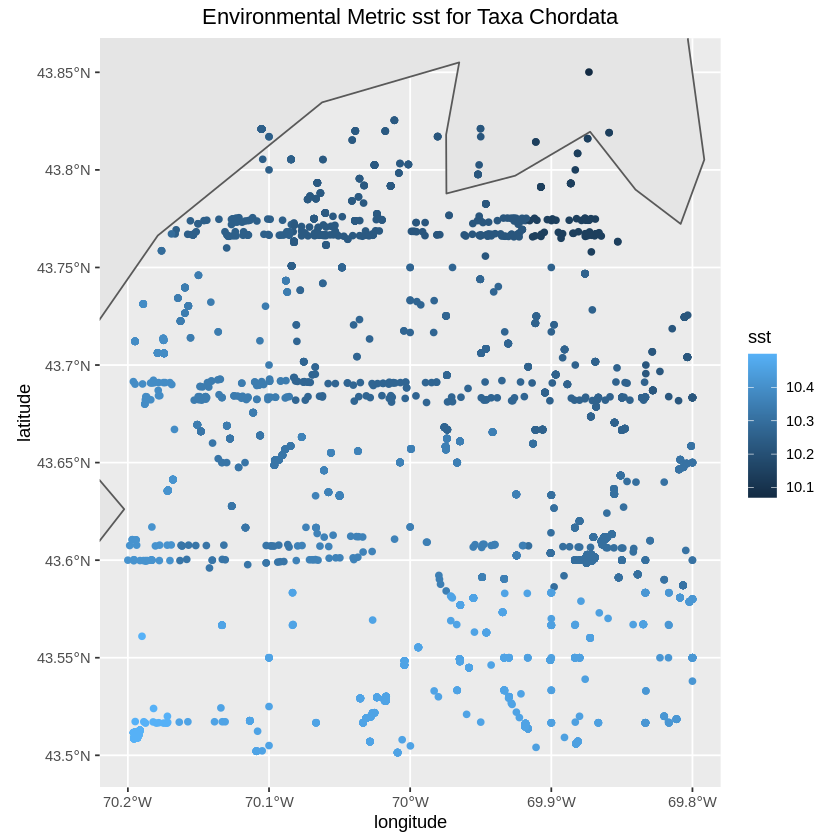

In [9]:
##TEST OUT THE FUNCTION

testMAPresult <- MapEnvironmentalMetric(testDFresult, taxatest, metrictest)

testMAPresult
